In [115]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
import numpy as np
import json
import sys
from matplotlib import rcParams
import subprocess as proc
import os
import shutil
import IPython.display as aud
import glob as g


#representation courbe de confiance des mots transcrits par paty 
#extraction des informations du fichier json de transcription par paty

In [116]:
#parameters
#exemple avec VITISPROHIBITAEXTRAIT4_asr_reco.json

transcripName = "VITISPROHIBITAEXTRAIT4_asr_reco.json"
audioName = "VITIS_PROHIBITA___EXTRAIT_4"

seuil = 0.5
extrait_range = 2 #en seconde

In [117]:
dossT = "patyTranscription/"
dossA = "audios\\" + audioName

nomfichier = dossT + transcripName
nomaudio = dossA + "\\" + audioName +".wav"


with open(nomfichier) as json_data:
    data_dict = json.load(json_data)
confidenceMoy = data_dict["confidence-score"]
words = data_dict["speakers"]
confSpk = []
data = [] #stock les data
for i in range(0, len(words)):
    temp = []
    for j in range(len(words[i]["words"])):
        words[i]["words"][j]["speaker"] = "spk" + str(i)
        data.append(words[i]["words"][j])
        temp.append(words[i]["words"][j]["conf"])
    confSpk.append(temp)

In [118]:
#mettre en ordre chronologique croissant par key "start" 
sortedtime = sorted(data, key=lambda d: d['start'])
listConf = []

listWord = []
listTime = []
abscisse = []
listT = []
for i in range(len(sortedtime)):
    listConf.append(sortedtime[i]["conf"])
    listWord.append(sortedtime[i]["word"])
    listTime.append( (sortedtime[i]["start"], sortedtime[i]["end"]) )
    listT.append(sortedtime[i]["start"])
    abscisse.append( str(listTime[i][0]) + "\n" + sortedtime[i]["speaker"] + ": " + str(listWord[i] ) )
    #print(abscisse[i])
    #print("\n")
#print(listConf)
#print(listWord)
#print(listTime)
npConf = np.array(listConf)
npWord = np.array(listWord)
npAbscisse = np.array(abscisse)
npTime = np.array(listTime)
npT = np.array(listT)

In [119]:
print(len(npWord))

131


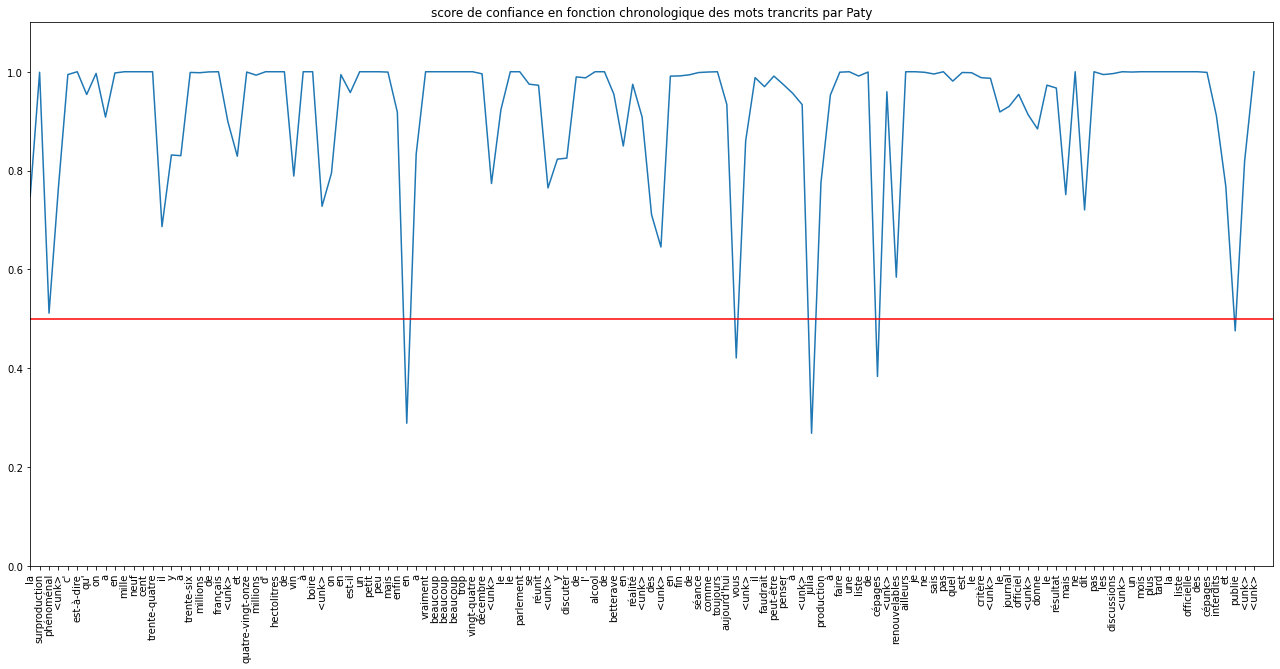

In [120]:
dimx = len(npConf) * 0.17
dimy = 10
plt.figure(figsize=(dimx, dimy))

plt.title("score de confiance en fonction chronologique des mots trancrits par Paty")
plt.plot(npConf)
plt.ylim(0,1.1)
plt.xlim(1,len(npConf)+1)
plt.xticks(range(len(npWord)), npWord, rotation = 90)
plt.axhline(y=seuil, xmin=0, xmax=1, color = "red", label ="seuil")
#plt.annotate('seuil', xy = (0, seuil), xytext = (0, seuil))
plt.show()

In [121]:
#display little audio extrait of speech under the "seuil"

#get all the word under seuil conf
oddwords = []
timers = [] #couple of time to get the timer extrait of oddword
oddspeakers = []
for element in sortedtime:
    if element["conf"] < seuil or element["word"] == "<unk>":
        oddwords.append("unk") if element["word"] == "<unk>" else oddwords.append(element["word"])
        start = round(element["start"] - extrait_range, 1) if element["start"] - extrait_range > 0 else 0
        end = round(element["end"] + extrait_range, 1)
        #add 2s of duration at debut and fin
        timers.append((start, end))
        oddspeakers.append( element["speaker"])
#print(timers)
#print(oddwords)
#print(oddspeakers)

In [127]:
#create all oddaudio
oddw_folder = "odd_words"
if not(os.path.exists(oddw_folder)):
    os.mkdir("./" + oddw_folder)
tempdest = "odd_words_" + audioName
tempdir = oddw_folder + "/" + tempdest
if (os.path.exists(tempdir)):
    shutil.rmtree(tempdir) #remove in order to clean before
os.mkdir(tempdir)
#create temp file for each audio 
#name struct : [start]_oddword_[end]speaker.mp3
print("running...")
for index, (start, end)  in enumerate(timers):
    name = oddw_folder + "/" + tempdest + "/" + "[" + str(start) + "]" + oddwords[index] + "[" + str(end) + "]" + oddspeakers[index] + ".wav"
    print(name)
    length = round(end - start,1)
    cmd = "ffmpeg -ss " + str(start) + " -t " + str(length) + " -i " +  "\"" + nomaudio + "\"" + " \"" + name + "\""
    print(cmd)
    proc.run(cmd, shell = True)

running...
odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[0]unk[4.2]spk0.wav
ffmpeg -ss 0 -t 4.2 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[0]unk[4.2]spk0.wav"
odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[2.9]unk[7.3]spk0.wav
ffmpeg -ss 2.9 -t 4.4 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[2.9]unk[7.3]spk0.wav"
odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[6.4]unk[11.0]spk0.wav
ffmpeg -ss 6.4 -t 4.6 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[6.4]unk[11.0]spk0.wav"
odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[8.6]en[12.7]spk0.wav
ffmpeg -ss 8.6 -t 4.1 -i "audios\VITIS_PROHIBITA___EXTRAIT_4\VITIS_PROHIBITA___EXTRAIT_4.wav" "odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[8.6]en[12.7]spk0.wav"
odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4/[

In [130]:
#display of oddaudios
#all .wav files in tempdir
oddaudios = g.glob(tempdir +"/*.wav")

#displaying each audio
for oddword in oddaudios:
    print(oddword)
    aud.display(aud.Audio(data = oddword, autoplay = False))



odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[0]unk[4.2]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[11.5]unk[15.9]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[14.0]unk[18.2]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[16.7]unk[21.2]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[17.5]unk[21.8]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[2.9]unk[7.3]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[20.3]vous[24.6]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[20.7]unk[25.0]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[22.3]unk[26.6]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[22.6]julia[26.9]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[24.8]cépages[29.4]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[25.4]unk[29.7]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[29.2]unk[33.8]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[30.9]unk[35.1]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[33.5]unk[41.6]spk1.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[40.6]publie[45.1]spk2.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[41.2]unk[54.1]spk3.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[50.1]unk[58.8]spk4.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[6.4]unk[11.0]spk0.wav


odd_words/odd_words_VITIS_PROHIBITA___EXTRAIT_4\[8.6]en[12.7]spk0.wav


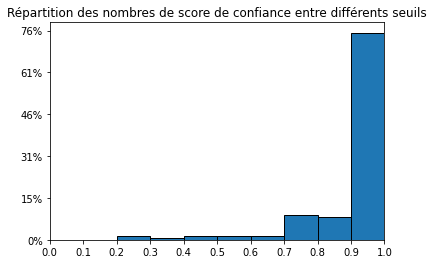

In [11]:
#affichage histogramme (nb de score en tranche seuil de 0.1)
plt.hist(npConf, range= (0, 1), bins = 10, edgecolor = 'black')
plt.title("Répartition des nombres de score de confiance entre différents seuils")
histox = 15
histoy = 10
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(npConf)))
plt.xticks(abx)
plt.show()

In [12]:
"""for i in range(len(confSpk)):
    plt.hist(confSpk[i], range= (0, 1), bins = 10, edgecolor = 'red')
    plt.title("Répartition du nombre de score de confiance du spk" + str(i))
    histox = 15
    histoy = 10
    plt.xlim(0,1)
    abx = np.arange(0, 1.1, 0.1)
    plt.xticks(abx)
    plt.show()
"""

'for i in range(len(confSpk)):\n    plt.hist(confSpk[i], range= (0, 1), bins = 10, edgecolor = \'red\')\n    plt.title("Répartition du nombre de score de confiance du spk" + str(i))\n    histox = 15\n    histoy = 10\n    plt.xlim(0,1)\n    abx = np.arange(0, 1.1, 0.1)\n    plt.xticks(abx)\n    plt.show()\n'

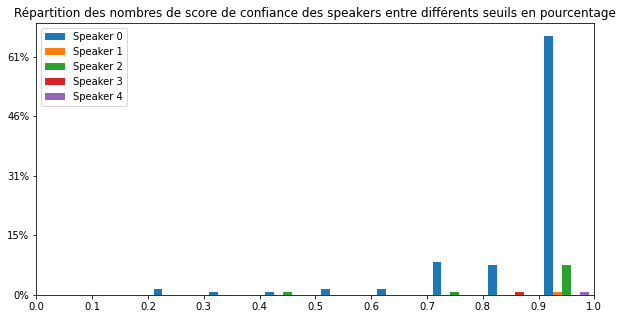

In [13]:
#Répartition du nombre de score de confiance des mots dans différent intervalle de chaque speaker
nbSpk = len(confSpk)
plt.figure(figsize=(nbSpk * 2, dimy / 2 ))
plt.hist(confSpk, range = (0, 1), label = ["Speaker " + str(i) for i in range(nbSpk)])
plt.legend(loc='upper left')
plt.title("Répartition des nombres de score de confiance des speakers entre différents seuils en pourcentage")
plt.xlim(0,1)
abx = np.arange(0, 1.1, 0.1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(npConf)))
plt.xticks(abx)
plt.show()

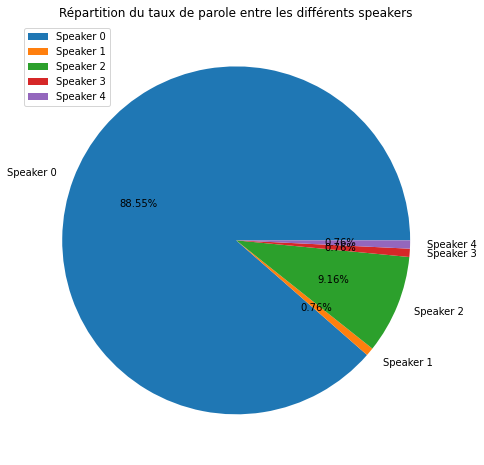

In [14]:
#taux de parole (nombre de mot dit) de chaque speaker
#tabword_speaker = [nb_word_spk0, nb_word_spk1, ...]
tabword_speaker = [len(confSpk[i]) for i in range(nbSpk)]

plt.figure(figsize = (8, 8))
plt.pie(tabword_speaker, labels = ["Speaker " + str(i) for i in range(nbSpk)],
           autopct = lambda x: str(round(x, 2)) + '%',
           )
plt.title("Répartition du taux de parole entre les différents speakers")
plt.legend(loc='upper left')

In [15]:
#moyenne des score de confiance de chaque speakers
tabmoy_speaker = [np.mean(confSpk[i]) for i in range(nbSpk)]
tabmoy_speaker

[0.9153718448275862, 1.0, 0.9294457500000001, 0.819292, 1.0]

In [16]:
npWord

array(['la', 'surproduction', 'phénoménal', '<unk>', "c'", 'est-à-dire',
       "qu'", 'on', 'a', 'en', 'mille', 'neuf', 'cent', 'trente-quatre',
       'il', 'y', 'a', 'trente-six', 'millions', 'de', 'français',
       '<unk>', 'et', 'quatre-vingt-onze', 'millions', "d'",
       'hectolitres', 'de', 'vin', 'à', 'boire', '<unk>', 'on', 'en',
       'est-il', 'un', 'petit', 'peu', 'mais', 'enfin', 'en', 'a',
       'vraiment', 'beaucoup', 'beaucoup', 'beaucoup', 'trop',
       'vingt-quatre', 'décembre', '<unk>', 'le', 'le', 'parlement', 'se',
       'réunit', '<unk>', 'y', 'discuter', 'de', "l'", 'alcool', 'de',
       'betterave', 'en', 'réalité', '<unk>', 'des', '<unk>', 'en', 'fin',
       'de', 'séance', 'comme', 'toujours', "aujourd'hui", 'vous',
       '<unk>', 'il', 'faudrait', 'peut-être', 'penser', 'à', '<unk>',
       'julia', 'production', 'à', 'faire', 'une', 'liste', 'de',
       'cépages', '<unk>', 'renouvelables', 'ailleurs', 'je', 'ne',
       'sais', 'pas', 'quel', 'es

In [17]:
#building raw text
def buildText(tabWord):
    text = ""
    for word in tabWord:
        if word != "<unk>":
            if word[-1] != "'":
                text += word + " "
            else:
                text += word
    return text
text = buildText(npWord)

In [55]:
import spacy

In [19]:
#python -m spacy download fr_core_news_sm
#model français
nlp = spacy.load("fr_core_news_sm")
rawText = nlp(text)
stemText = ""
rawText

la surproduction phénoménal c'est-à-dire qu'on a en mille neuf cent trente-quatre il y a trente-six millions de français et quatre-vingt-onze millions d'hectolitres de vin à boire on en est-il un petit peu mais enfin en a vraiment beaucoup beaucoup beaucoup trop vingt-quatre décembre le le parlement se réunit y discuter de l'alcool de betterave en réalité des en fin de séance comme toujours aujourd'hui vous il faudrait peut-être penser à julia production à faire une liste de cépages renouvelables ailleurs je ne sais pas quel est le critère le journal officiel donne le résultat mais ne dit pas les discussions un mois plus tard la liste officielle des cépages interdits et publie 

In [23]:
#remove stop_list + stemming (core word)
stemText = nlp(buildText([str(token.lemma_) for token in rawText if not(token.is_stop or token.is_punct)]))
stemText = nlp(buildText([str(token.lemma_) for token in stemText if not(token.is_stop or token.is_punct)]))
stemText


surproduction phénoménal neuf trente-quatre trente-si million français quatre-vingt-onze million hectolitre vin boire petit vraiment beaucoup beaucoup beaucoup trop vingt-quatre décembre parlement réunir discuter alcool betterav réalité fin séance aujourd'hui falloir peut-être penser julia production faire liste cépage renouvelable ailleurs savoir critère journal officiel donne résultat discussion mois tard liste officiel cépag interdir publie 

In [26]:
#each token has a vector of word embedding
word_emb = [word.vector for word in stemText]
#reduction de dimension (tsne ou acp)


In [27]:
#representation des words embeddings
from sklearn.manifold import TSNE

D:\AnacondaPyhtonEnv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\AnacondaPyhtonEnv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


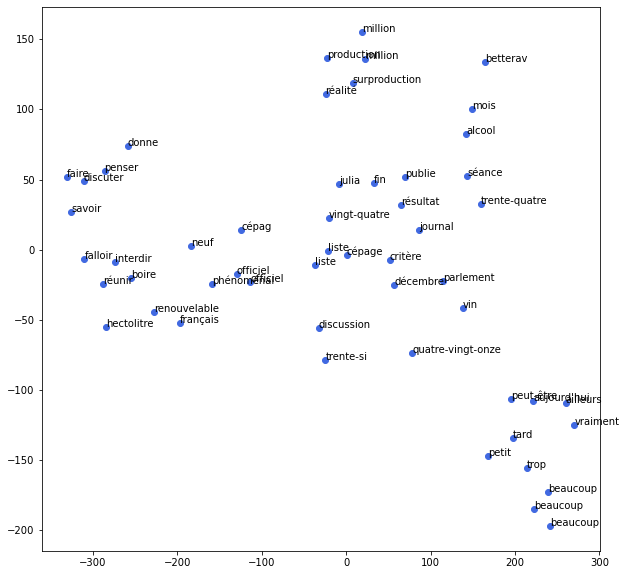

In [106]:
tsne2d = TSNE(n_components = 2, perplexity = 5, random_state = 0)
tsne_word_emb2d = tsne2d.fit_transform(word_emb)
x = tsne_word_emb2d[:,0]
y = tsne_word_emb2d[:,1]
plt.figure(figsize=(dimy, dimy))
for i, txt in enumerate(stemText):
    plt.scatter(x[i], y[i], c = 'royalblue')
    plt.text(x[i], (y[i]), str(txt))
plt.show()

D:\AnacondaPyhtonEnv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\AnacondaPyhtonEnv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


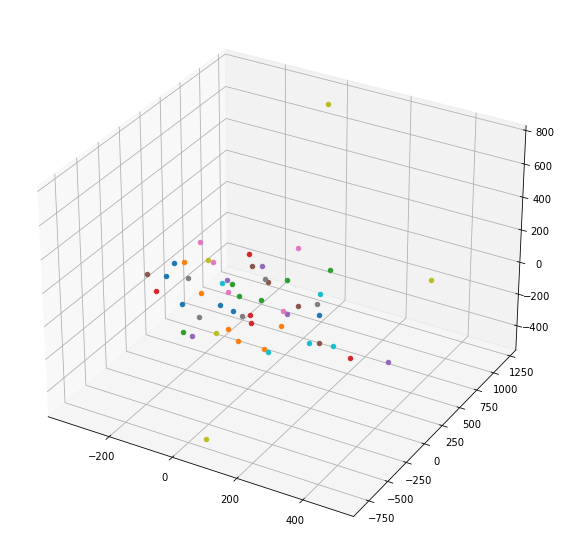

In [105]:
tsne3d = TSNE(n_components = 3, perplexity = 15, random_state = 0)
tsne_word_emb3d = tsne3d.fit_transform(word_emb)

fig = plt.figure(figsize = (dimx, dimy))
ax = fig.add_subplot(projection='3d')

for x, y, z in tsne_word_emb3d:
    ax.scatter(x, y, z)
plt.show()